I chose this dataset because I find things like personality types very fascinating even if there isn't any sort of scientific backing to it. I thought there would be an interesting story to tell, though the story that came through was not the one I was expecting.

Some questions that I was going to consider when looking at this dataset are as follows:

· Are introverts more or less likely than extroverts to listen to upbeat music?

· Are there trends between those who are sensing (S) vs those who use intuition (N)?

· Can we tell if introverts are more likely to score in a certain subgroup than extroverts, and vice versa based on trends found?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mbti = pd.read_csv('combined_mbti_df.csv')

In [3]:
mbti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mbti                    4081 non-null   object 
 1   function_pair           4081 non-null   object 
 2   danceability_mean       4081 non-null   float64
 3   danceability_stdev      4081 non-null   float64
 4   energy_mean             4081 non-null   float64
 5   energy_stdev            4081 non-null   float64
 6   loudness_mean           4081 non-null   float64
 7   loudness_stdev          4081 non-null   float64
 8   mode_mean               4081 non-null   float64
 9   mode_stdev              4081 non-null   float64
 10  speechiness_mean        4081 non-null   float64
 11  speechiness_stdev       4081 non-null   float64
 12  acousticness_mean       4081 non-null   float64
 13  acousticness_stdev      4081 non-null   float64
 14  liveness_mean           4081 non-null   

I grabbed this dataset from Kaggle, so just to see how much cleaning might need to be done I take a look at the dataset's info. There are a handful of missing datapoints in the major/minor section of the dataset which I was planning on dropping anyway, so no worries there!

In [4]:
#Only selecting the first 22 columns since I'm not looking for specific keys; 
#I can get a general idea if the playlist leans towards major key (closer to 1) or minor key (closer to 0) from the mode column 
mbti = mbti.iloc[:, :22]

In preparation for my analysis to see whether personality type affects music taste, I make new sub-dataframes from this large one:

In [5]:
#Breaking down the dataframe into smaller subsections
introverted = mbti[mbti['mbti'].isin(['INFJ', 'INTJ', 'INFP', 'INTP', 'ISTP', 'ISFP', 'ISFJ', 'ISTJ'])].copy()
extroverted = mbti[mbti['mbti'].isin(['ESTP', 'ENFP', 'ENTJ', 'ENTP', 'ENFJ', 'ESFP', 'ESTJ', 'ESFJ'])].copy()
sj_sent = mbti[mbti['function_pair'] == 'SJ'].copy()
sp_exp = mbti[mbti['function_pair'] == 'SP'].copy()
nf_dip = mbti[mbti['function_pair'] == 'NF'].copy()
nt_ana = mbti[mbti['function_pair'] == 'NT'].copy()

And then I begin to check out what the general spread is for energy, mode, acousticness, liveness, valence (how upbeat a song is), and instrumentalness. 

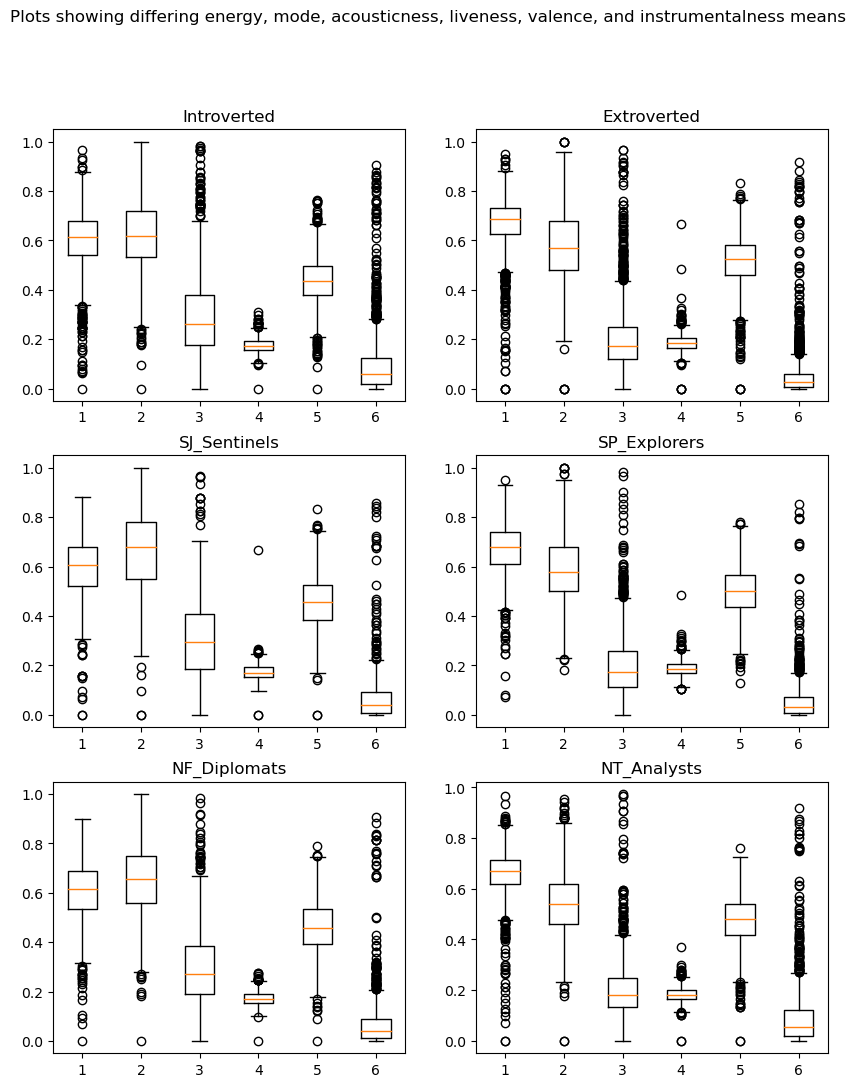

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Plots showing differing energy, mode, acousticness, liveness, valence, and instrumentalness means')
axs[0,0].boxplot(introverted[['energy_mean', 'mode_mean', 'acousticness_mean', 'liveness_mean', 
                            'valence_mean', 'instrumentalness_mean']])
axs[0,0].set_title('Introverted')
axs[0,1].boxplot(extroverted[['energy_mean', 'mode_mean', 'acousticness_mean', 'liveness_mean', 
                            'valence_mean', 'instrumentalness_mean']])
axs[0,1].set_title('Extroverted')
axs[1,0].boxplot(sj_sent[['energy_mean', 'mode_mean', 'acousticness_mean', 'liveness_mean', 
                            'valence_mean', 'instrumentalness_mean']])
axs[1,0].set_title('SJ_Sentinels')
axs[1,1].boxplot(sp_exp[['energy_mean', 'mode_mean', 'acousticness_mean', 'liveness_mean', 
                            'valence_mean', 'instrumentalness_mean']])
axs[1,1].set_title('SP_Explorers')
axs[2,0].boxplot(nf_dip[['energy_mean', 'mode_mean', 'acousticness_mean', 'liveness_mean', 
                            'valence_mean', 'instrumentalness_mean']])
axs[2,0].set_title('NF_Diplomats')
axs[2,1].boxplot(nt_ana[['energy_mean', 'mode_mean', 'acousticness_mean', 'liveness_mean', 
                            'valence_mean', 'instrumentalness_mean']])
axs[2,1].set_title('NT_Analysts')

plt.show()

I think the thing that interests me the most after looking at these plots is that introverts, SJ Sentinels, NF Diplomats, and NT Analysts all have similar instrumentalness ranges while extroverts and SP Explorers are noticeably different in that category.

Not going to lie, I was pretty disappointed with how similar all the graphs looked. The amount of outliers per graph doesn't tell me too much because the amount of data points per group varies quite a bit.

In [7]:
print(len(introverted))
print(len(extroverted))
print(len(sj_sent))
print(len(sp_exp))
print(len(nf_dip))
print(len(nt_ana))

2159
1922
629
1094
1178
1180


In [8]:
#Getting rid of all 0 values since SP Explorers has none and skewed all my other graphs
#If I do this before the box plots, everything except the SP Explorers group becomes blank... 
introverted.replace(0, np.nan, inplace=True)
extroverted.replace(0, np.nan, inplace=True)
sj_sent.replace(0, np.nan, inplace=True)
sp_exp.replace(0, np.nan, inplace=True)
nf_dip.replace(0, np.nan, inplace=True)
nt_ana.replace(0, np.nan, inplace=True)

Below I compare two attributes of the music to each other and compare the results between groups. Notice anything? (There are six sets of graphs - be prepared to scroll for a bit)

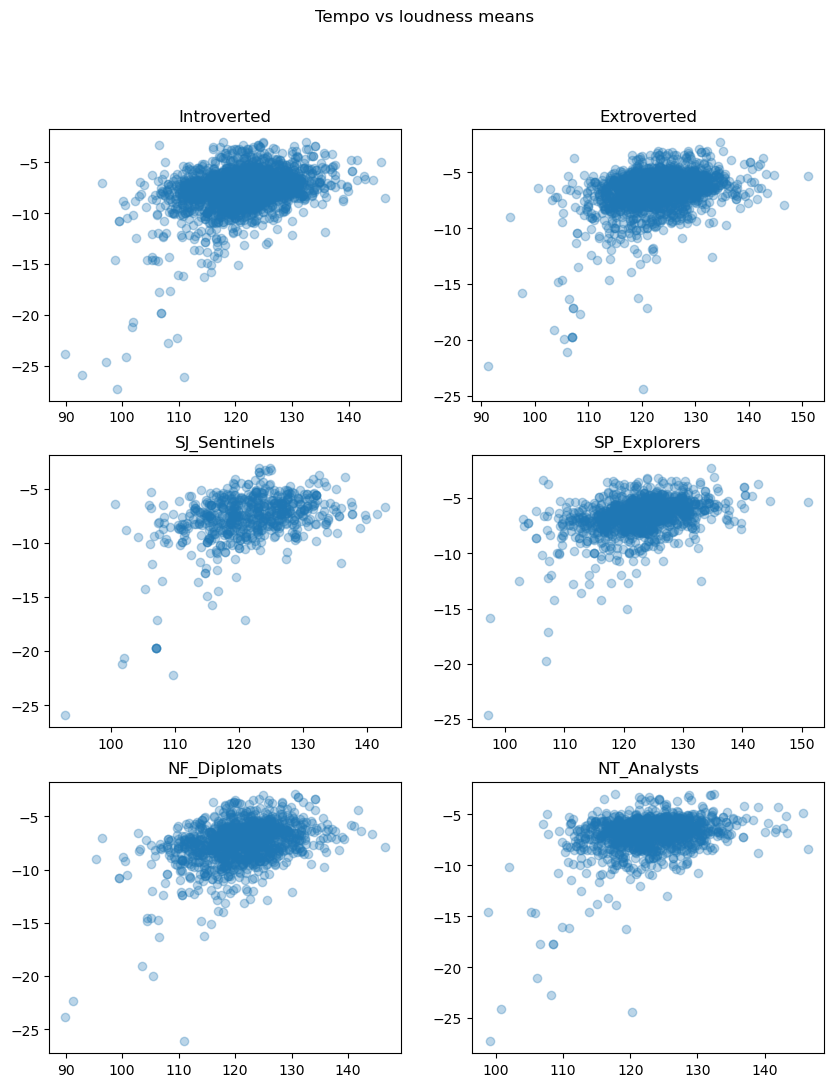

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Tempo vs loudness means')
axs[0,0].scatter(introverted['tempo_mean'], introverted['loudness_mean'], alpha=.3)
axs[0,0].set_title('Introverted')
axs[0,1].scatter(extroverted['tempo_mean'], extroverted['loudness_mean'], alpha=.3)
axs[0,1].set_title('Extroverted')
axs[1,0].scatter(sj_sent['tempo_mean'], sj_sent['loudness_mean'], alpha=.3)
axs[1,0].set_title('SJ_Sentinels')
axs[1,1].scatter(sp_exp['tempo_mean'], sp_exp['loudness_mean'], alpha=.3)
axs[1,1].set_title('SP_Explorers')
axs[2,0].scatter(nf_dip['tempo_mean'], nf_dip['loudness_mean'], alpha=.3)
axs[2,0].set_title('NF_Diplomats')
axs[2,1].scatter(nt_ana['tempo_mean'], nt_ana['loudness_mean'], alpha=.3)
axs[2,1].set_title('NT_Analysts')

plt.show()

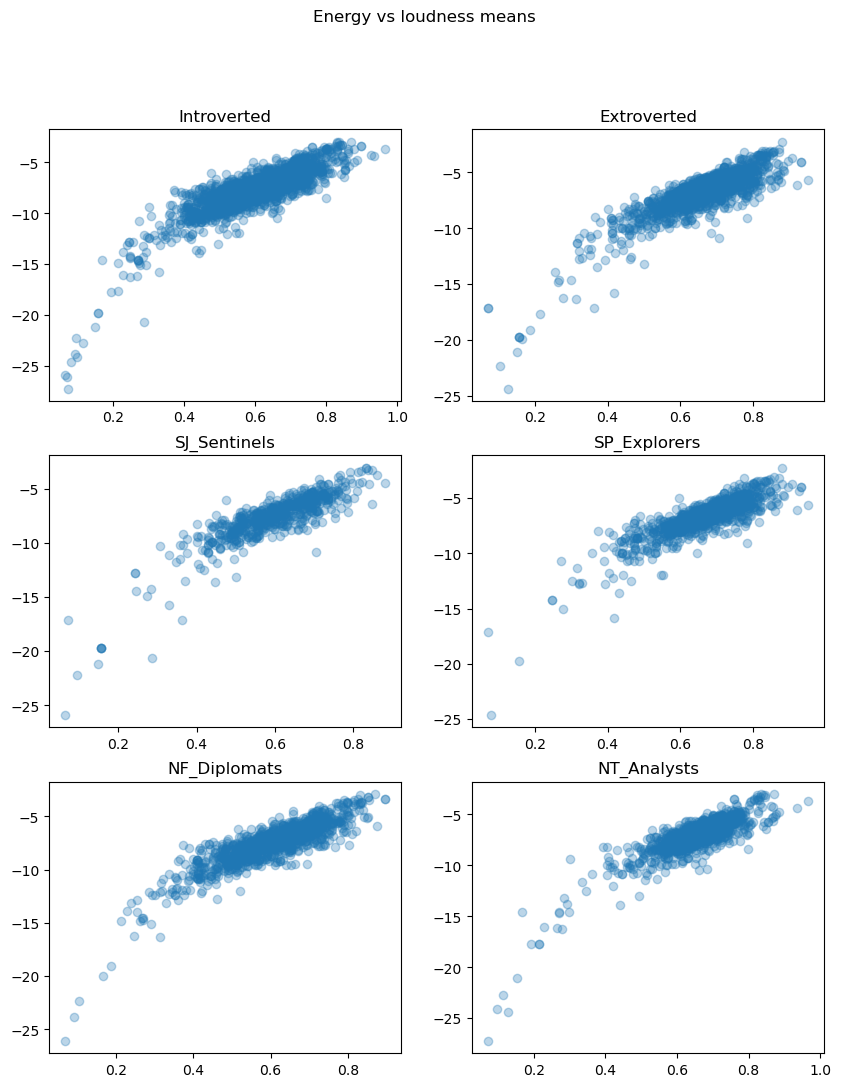

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Energy vs loudness means')
axs[0,0].scatter(introverted['energy_mean'], introverted['loudness_mean'], alpha=.3)
axs[0,0].set_title('Introverted')
axs[0,1].scatter(extroverted['energy_mean'], extroverted['loudness_mean'], alpha=.3)
axs[0,1].set_title('Extroverted')
axs[1,0].scatter(sj_sent['energy_mean'], sj_sent['loudness_mean'], alpha=.3)
axs[1,0].set_title('SJ_Sentinels')
axs[1,1].scatter(sp_exp['energy_mean'], sp_exp['loudness_mean'], alpha=.3)
axs[1,1].set_title('SP_Explorers')
axs[2,0].scatter(nf_dip['energy_mean'], nf_dip['loudness_mean'], alpha=.3)
axs[2,0].set_title('NF_Diplomats')
axs[2,1].scatter(nt_ana['energy_mean'], nt_ana['loudness_mean'], alpha=.3)
axs[2,1].set_title('NT_Analysts')

plt.show()

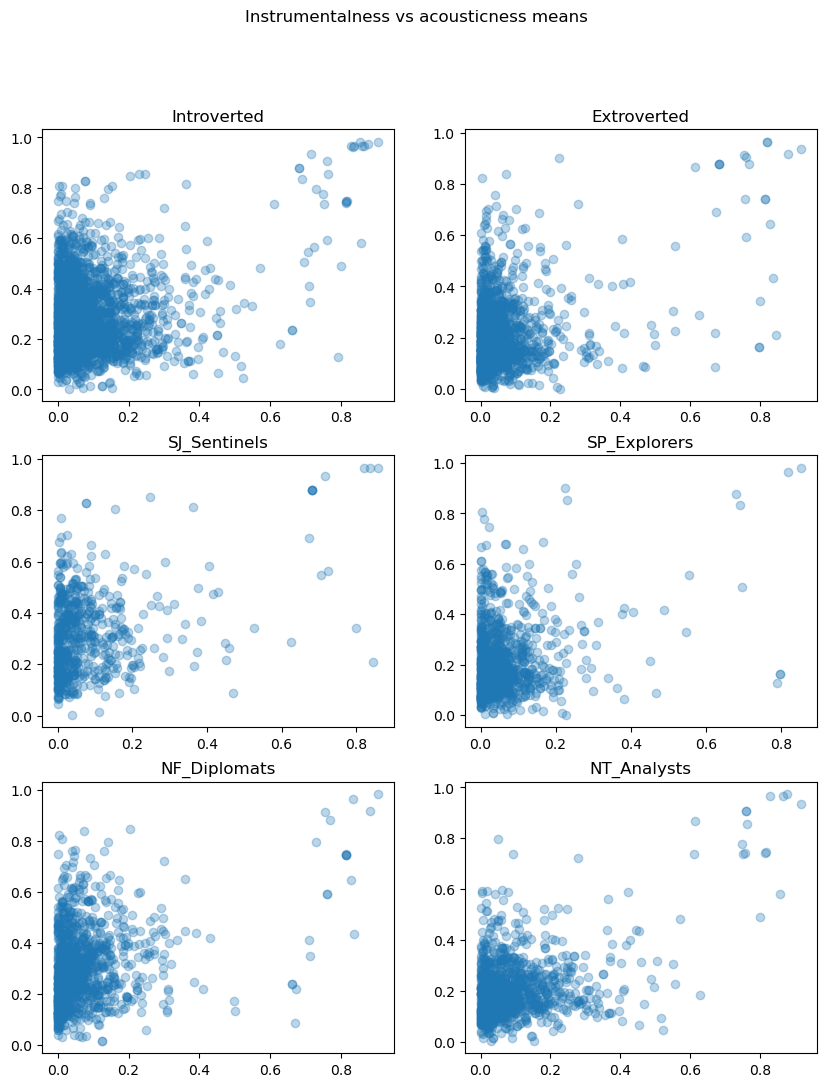

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Instrumentalness vs acousticness means')
axs[0,0].scatter(introverted['instrumentalness_mean'], introverted['acousticness_mean'], alpha=.3)
axs[0,0].set_title('Introverted')
axs[0,1].scatter(extroverted['instrumentalness_mean'], extroverted['acousticness_mean'], alpha=.3)
axs[0,1].set_title('Extroverted')
axs[1,0].scatter(sj_sent['instrumentalness_mean'], sj_sent['acousticness_mean'], alpha=.3)
axs[1,0].set_title('SJ_Sentinels')
axs[1,1].scatter(sp_exp['instrumentalness_mean'], sp_exp['acousticness_mean'], alpha=.3)
axs[1,1].set_title('SP_Explorers')
axs[2,0].scatter(nf_dip['instrumentalness_mean'], nf_dip['acousticness_mean'], alpha=.3)
axs[2,0].set_title('NF_Diplomats')
axs[2,1].scatter(nt_ana['instrumentalness_mean'], nt_ana['acousticness_mean'], alpha=.3)
axs[2,1].set_title('NT_Analysts')

plt.show()

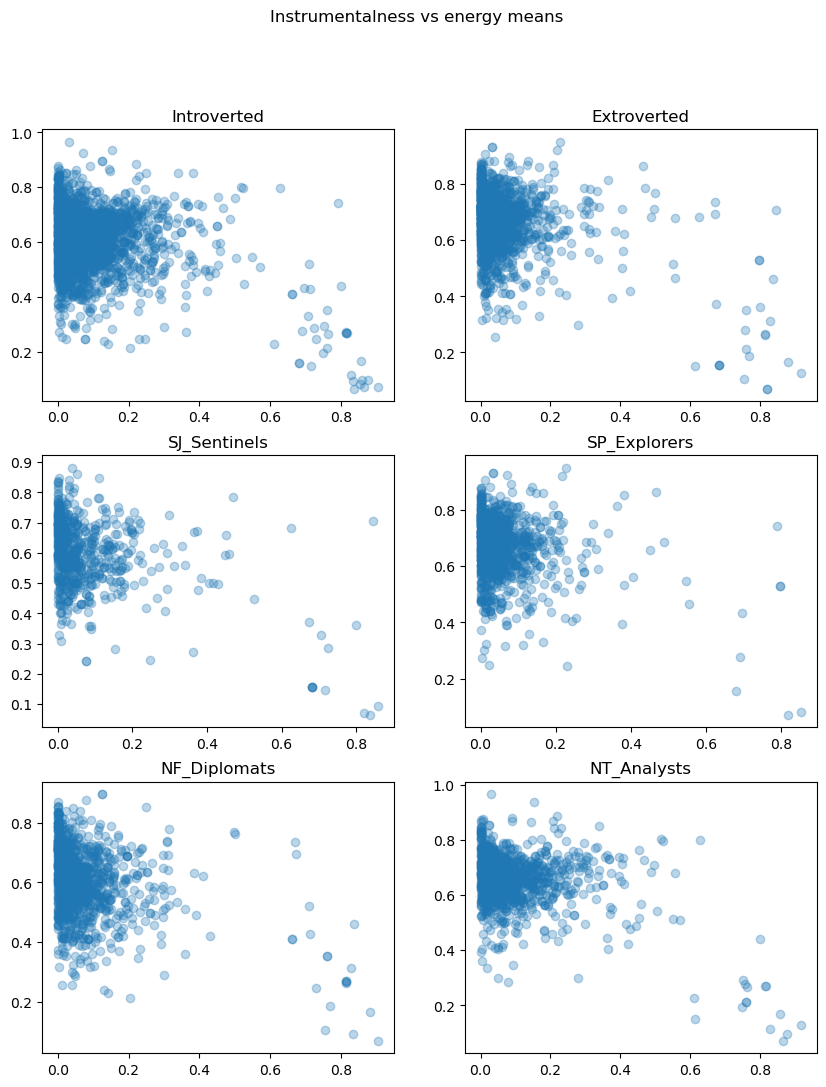

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Instrumentalness vs energy means')
axs[0,0].scatter(introverted['instrumentalness_mean'], introverted['energy_mean'], alpha=.3)
axs[0,0].set_title('Introverted')
axs[0,1].scatter(extroverted['instrumentalness_mean'], extroverted['energy_mean'], alpha=.3)
axs[0,1].set_title('Extroverted')
axs[1,0].scatter(sj_sent['instrumentalness_mean'], sj_sent['energy_mean'], alpha=.3)
axs[1,0].set_title('SJ_Sentinels')
axs[1,1].scatter(sp_exp['instrumentalness_mean'], sp_exp['energy_mean'], alpha=.3)
axs[1,1].set_title('SP_Explorers')
axs[2,0].scatter(nf_dip['instrumentalness_mean'], nf_dip['energy_mean'], alpha=.3)
axs[2,0].set_title('NF_Diplomats')
axs[2,1].scatter(nt_ana['instrumentalness_mean'], nt_ana['energy_mean'], alpha=.3)
axs[2,1].set_title('NT_Analysts')

plt.show()

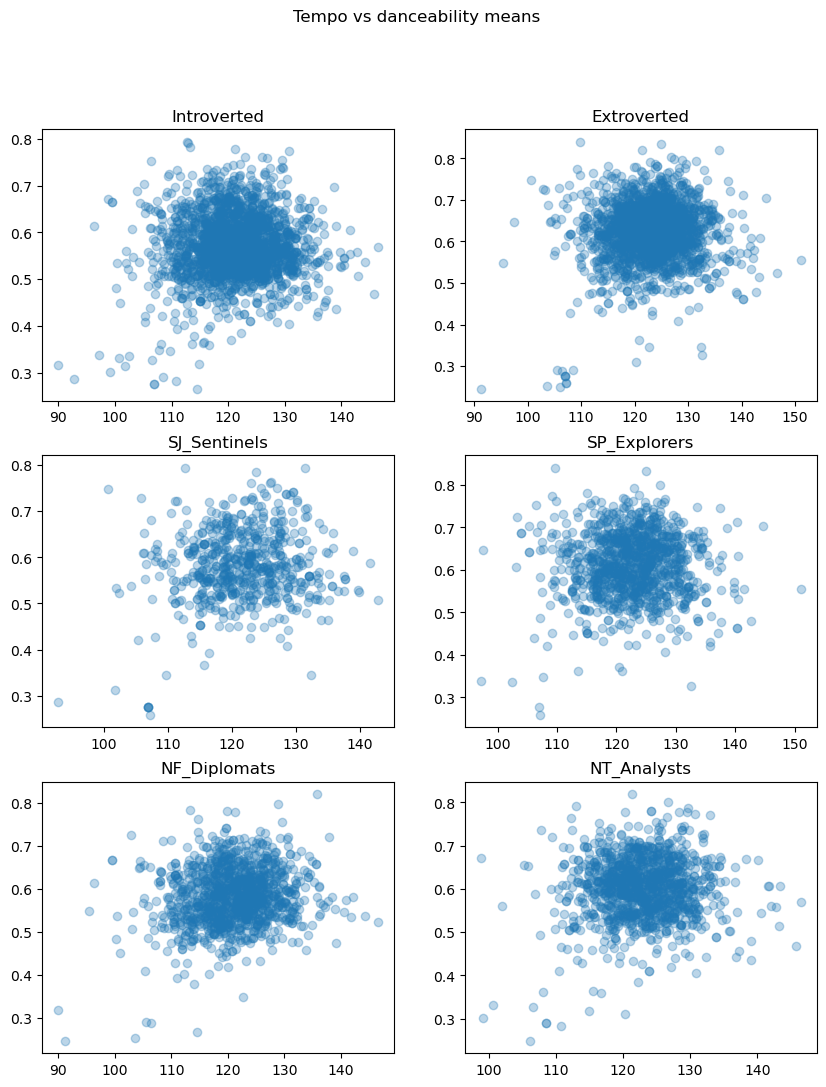

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Tempo vs danceability means')
axs[0,0].scatter(introverted['tempo_mean'], introverted['danceability_mean'], alpha=.3)
axs[0,0].set_title('Introverted')
axs[0,1].scatter(extroverted['tempo_mean'], extroverted['danceability_mean'], alpha=.3)
axs[0,1].set_title('Extroverted')
axs[1,0].scatter(sj_sent['tempo_mean'], sj_sent['danceability_mean'], alpha=.3)
axs[1,0].set_title('SJ_Sentinels')
axs[1,1].scatter(sp_exp['tempo_mean'], sp_exp['danceability_mean'], alpha=.3)
axs[1,1].set_title('SP_Explorers')
axs[2,0].scatter(nf_dip['tempo_mean'], nf_dip['danceability_mean'], alpha=.3)
axs[2,0].set_title('NF_Diplomats')
axs[2,1].scatter(nt_ana['tempo_mean'], nt_ana['danceability_mean'], alpha=.3)
axs[2,1].set_title('NT_Analysts')

plt.show()

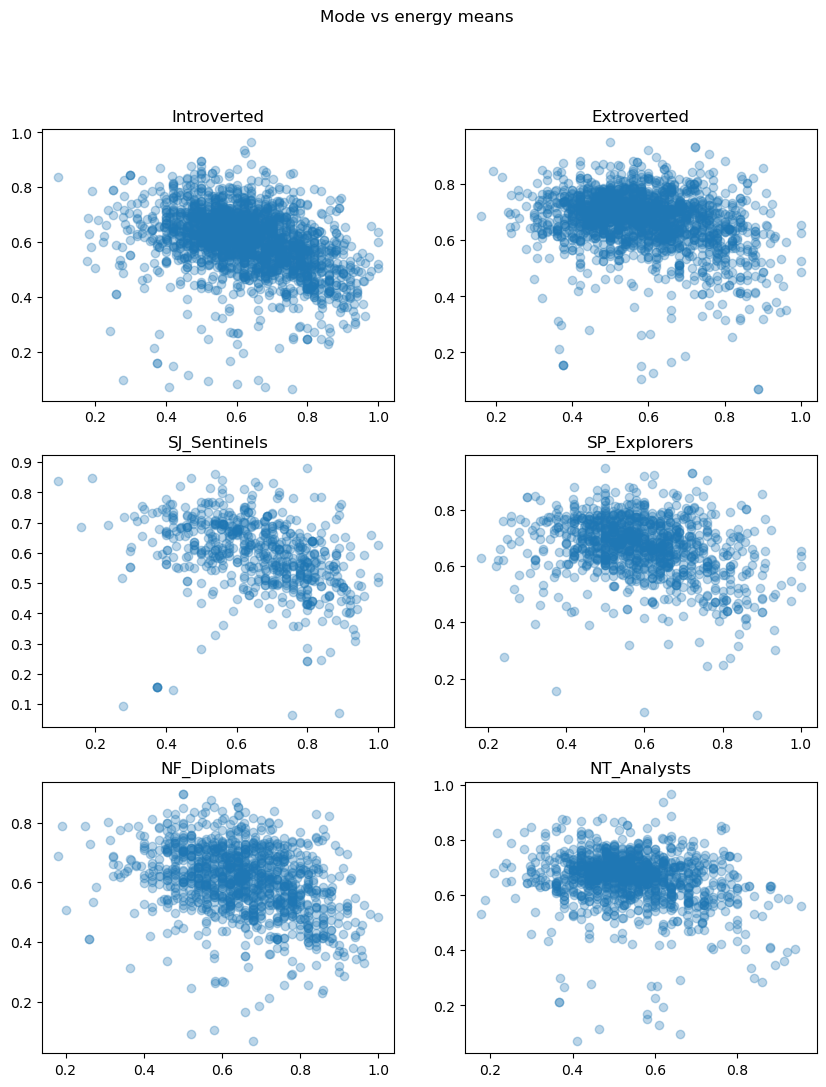

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Mode vs energy means')
axs[0,0].scatter(introverted['mode_mean'], introverted['energy_mean'], alpha=.3)
axs[0,0].set_title('Introverted')
axs[0,1].scatter(extroverted['mode_mean'], extroverted['energy_mean'], alpha=.3)
axs[0,1].set_title('Extroverted')
axs[1,0].scatter(sj_sent['mode_mean'], sj_sent['energy_mean'], alpha=.3)
axs[1,0].set_title('SJ_Sentinels')
axs[1,1].scatter(sp_exp['mode_mean'], sp_exp['energy_mean'], alpha=.3)
axs[1,1].set_title('SP_Explorers')
axs[2,0].scatter(nf_dip['mode_mean'], nf_dip['energy_mean'], alpha=.3)
axs[2,0].set_title('NF_Diplomats')
axs[2,1].scatter(nt_ana['mode_mean'], nt_ana['energy_mean'], alpha=.3)
axs[2,1].set_title('NT_Analysts')

plt.show()

Let's review the questions I had posed at the beginning of the notebook, now that we've looked at this data:

· Are introverts more or less likely than extroverts to listen to upbeat music? Not really. There is a slight difference between the two groups, with introverts having a median of .4 and extroverts having a median of .5. More data could be collected for a more solid decision on this, however.

· Are there trends between those who are sensing (S) vs those who use intuition (N)? I didn't notice significant trends between the two groups; they all generally held the same shape across the plots.

· Can we tell if introverts are more likely to score in a certain subgroup than extroverts, and vice versa based on trends found? This question was a little ambitious in retrospect, however...with what I noticed with the instrumentalness between extroverts and SP Explorers, there could be some kind of linkage, or that could have just been a simple coincidence. 

What I thought was going to be an interesting comparison between personality types turned into more of an examination of what we humans generally gravitate towards when it comes to sounds that we like. Sure, each graph isn't completely identical - but the fact that they all have generally the same shape is just so telling to me how similar we all are despite what might seem like large differences on a more personal level. When looking at a larger scale, all individuality is erased and we become predictable, part of a greater whole.